## Series Temporales - Trends & Predicciones


In [1]:
quandl_key = 'mzbz-NvFsKvi5nu9uZ4x'
#!pip3 install quandl

In [37]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
# obtener acciones de TESLA de quandl
quandl.ApiConfig.api_key = quandl_key
data = quandl.get('WIKI/TSLA')

data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


### Cargar los datos de TESLA 

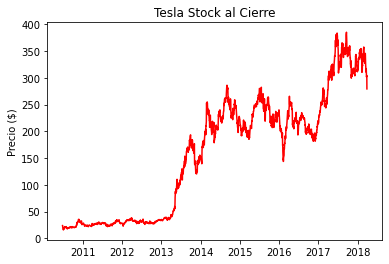

In [4]:
plt.plot(data.index, data['Adj. Close'], 'r')
plt.title('Tesla Stock al Cierre')
plt.ylabel('Precio ($)');
plt.show();

### Resampling

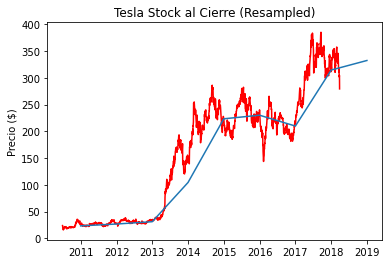

In [12]:
resample_weekly = data['Adj. Close'].resample('Y').mean()

plt.plot(data.index, data['Adj. Close'], 'r')
plt.plot(resample_weekly)
plt.title('Tesla Stock al Cierre (Resampled)')
plt.ylabel('Precio ($)');
plt.show();

### Rolling Windows (Tendencias cada 100 dias)

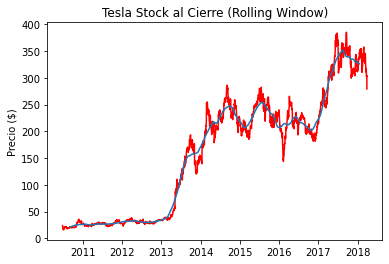

In [21]:
window_365d = data['Adj. Close'].rolling(window=100, center=True).mean()

plt.plot(data.index, data['Adj. Close'], 'r')
plt.plot(window_365d)
plt.title('Tesla Stock al Cierre (Rolling Window)')
plt.ylabel('Precio ($)');
plt.show();

## Predicciones en Series Temporales

### Auto-Regression

El método de autorregresión (AR) modela el siguiente paso en la secuencia como una función lineal de las observaciones en los pasos de tiempo anteriores.

La notación del modelo implica especificar el orden del modelo p como parámetro de la función AR, p. Ej. AR (p). Por ejemplo, AR (1) es un modelo de autorregresión de primer orden.

El método es adecuado para series de tiempo univariadas sin tendencia ni componentes estacionales.

[279.1810866]


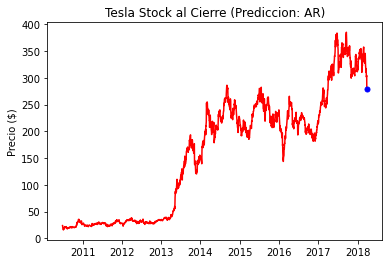

In [66]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html

from statsmodels.tsa.ar_model import AutoReg
x = data['Adj. Close'].values

# modelo
model = AutoReg(x, lags=1)
model_fit = model.fit()

# prediccion
predict = model_fit.predict(len(x), len(x))
print(predict)

next_day = data.index[-1] + datetime.timedelta(days=1)

n_df = pd.DataFrame({"data":predict})
n_df.index = [next_day]

plt.plot(data.index, data['Adj. Close'], 'r')
plt.plot(n_df.index, n_df, marker='o', markersize=5, color="blue")
plt.title('Tesla Stock al Cierre (Prediccion: AR)')
plt.ylabel('Precio ($)');
plt.show();

### Moving-Average

El método de la media móvil (MA) modela el siguiente paso de la secuencia como una función lineal de los errores residuales de un proceso medio en los pasos de tiempo anteriores.

Un modelo de media móvil es diferente de calcular la media móvil de la serie temporal.

La notación del modelo implica especificar el orden del modelo q como parámetro de la función MA, p. Ej. MA (q). Por ejemplo, MA (1) es un modelo de promedio móvil de primer orden.

El método es adecuado para series de tiempo univariadas sin tendencia ni componentes estacionales.

[196.75241659]


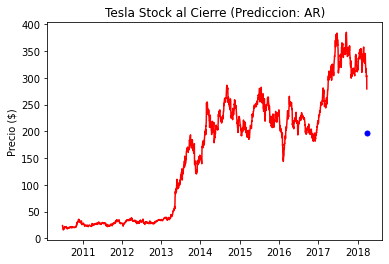

In [63]:
from statsmodels.tsa.arima_model import ARMA

x = data['Adj. Close'].values

# modelo
model = ARMA(x, order=(0,1))
model_fit = model.fit(disp=False)

# prediccion
predict = model_fit.predict(len(x), len(x))
print(predict)

next_day = data.index[-1] + datetime.timedelta(days=1)

n_df = pd.DataFrame({"data":predict})
n_df.index = [next_day]

plt.plot(data.index, data['Adj. Close'], 'r')
plt.plot(n_df.index, n_df, marker='o', markersize=5, color="blue")
plt.title('Tesla Stock al Cierre (Prediccion: AR)')
plt.ylabel('Precio ($)');
plt.show();

### Autoregressive Integrated Moving Average (ARIMA)

El método de media móvil integrada autorregresiva (ARIMA) modela el siguiente paso de la secuencia como una función lineal de las observaciones diferenciadas y los errores residuales en los pasos de tiempo anteriores.

Combina los modelos de autorregresión (AR) y de media móvil (MA), así como un paso de preprocesamiento de diferenciación de la secuencia para hacer que la secuencia sea estacionaria, llamado integración (I).

La notación para el modelo implica especificar el orden de los modelos AR (p), I (d) y MA (q) como parámetros para una función ARIMA, p. ARIMA (p, d, q). Un modelo ARIMA también se puede utilizar para desarrollar modelos AR, MA y ARMA.

El método es adecuado para series de tiempo univariadas con tendencia y sin componentes estacionales.

[278.52552436]


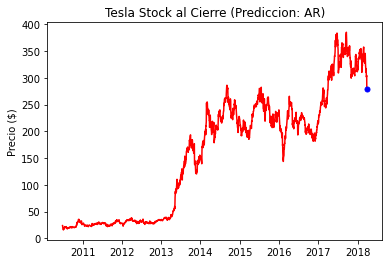

In [65]:
from statsmodels.tsa.arima_model import ARIMA

x = data['Adj. Close'].values

# modelo
model = ARIMA(x, order=(1,1,1))
model_fit = model.fit(disp=False)

# prediccion
predict = model_fit.predict(len(x), len(x),  typ='levels')
print(predict)

next_day = data.index[-1] + datetime.timedelta(days=1)

n_df = pd.DataFrame({"data":predict})
n_df.index = [next_day]

plt.plot(data.index, data['Adj. Close'], 'r')
plt.plot(n_df.index, n_df, marker='o', markersize=5, color="blue")
plt.title('Tesla Stock al Cierre (Prediccion: AR)')
plt.ylabel('Precio ($)');
plt.show();